## Task 1 - right part

In [1]:
import numpy as np
from scipy.special import logit, expit


def probability(X_non_zero):
    assert len(X_non_zero) == 20
    p = 0.08*np.sum(X_non_zero)
    return expit(p)
    #return logit(-p)
    #return 1/(1+np.exp(-p))
    #return np.log(p/(1-p))

In [2]:
from scipy.stats import bernoulli
from statsmodels.tsa.arima_process import ArmaProcess
from tqdm import tqdm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant
import numpy as np
import pandas as pd

np.random.seed(21)

# Set the AR coefficient
ar_coefficient = 0.5
p = 200
n = 500
replications = 10000

intercept_p_values = []
x1_data_p_values = []

# Generate the AR(1) time series
ar_process = ArmaProcess(ar=[1, -ar_coefficient])

# Calculate the p-values for each run
for i in tqdm(range(replications)):

    X = []
    y = []
    for j in range(n):
        time_series = ar_process.generate_sample(nsample=p)
        X.append(time_series)

        prob = probability(time_series[2:22])
        #print(prob)
        y_observation = bernoulli.rvs(p=prob)
        y.append(y_observation)

    try:
        sm_model = Logit(y, add_constant(X)).fit(disp=0) #like 30min
        intercept_p_values.append(sm_model.pvalues[0])
        x1_data_p_values.append(sm_model.pvalues[1])
    except Exception as e:
        continue

df = pd.DataFrame({"intercept p-values": intercept_p_values, "x1 p-values": x1_data_p_values})

df.to_csv("p_values_right.csv", index=False)

  0%|          | 3/10000 [00:00<39:43,  4.19it/s]/opt/conda/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
 14%|█▍        | 1384/10000 [05:40<31:45,  4.52it/s]/opt/conda/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
 19%|█▉        | 1917/10000 [07:51<30:28,  4.42it/s]/opt/conda/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/pyt

In [2]:
import pandas as pd

df = pd.read_csv("p_values_right.csv")

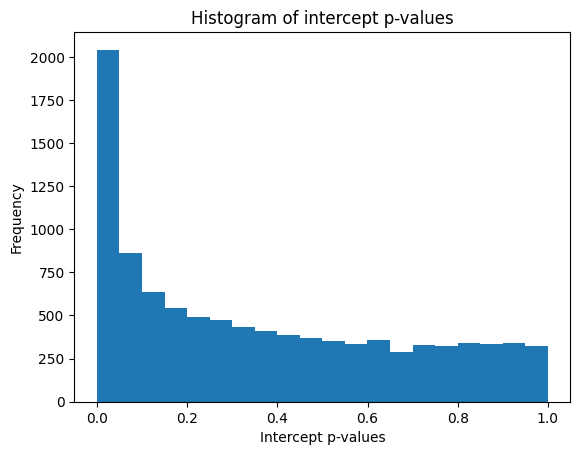

In [3]:
import matplotlib.pyplot as plt

# Show a histogram of the p-values
plt.hist(df['intercept p-values'], bins=20) #paper has 20 bins
plt.xlabel('Intercept p-values')
plt.ylabel('Frequency')
plt.title('Histogram of intercept p-values')
plt.show()

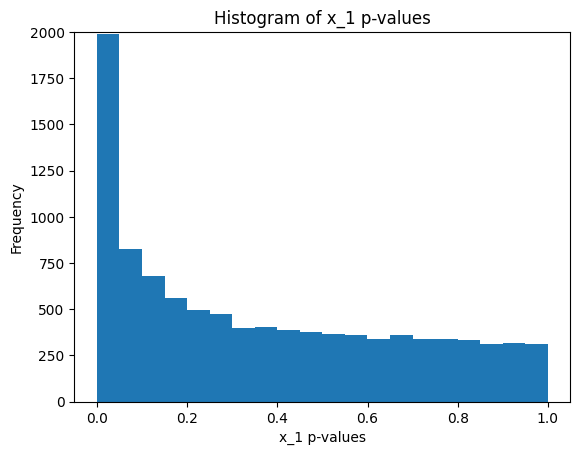

In [7]:
import matplotlib.pyplot as plt

# Show a histogram of the p-values
plt.hist(df['x1 p-values'], bins=20) #paper has 20 bins
plt.xlabel('x_1 p-values')
plt.ylabel('Frequency')
plt.title('Histogram of x_1 p-values')
plt.ylim((0, 2000))
plt.show()